# Unit 5 - Financial Planning - Part I - Personal Financial Planner

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/"

In [6]:
# Fetch current BTC price by executing `GET` request with url
btc_data = requests.get(btc_url)

# Fetch current ETH price by executing `GET` request with url
eth_data = requests.get(eth_url)

In [7]:
# Print `response_data variable`

print(btc_data)
print(eth_data)

<Response [200]>
<Response [200]>


In [8]:
# Store response using `content` attribute
btc_content = btc_data.content

# Format data as JSON
btc_now_data = btc_data.json()

In [9]:
# Store response using `content` attribute
eth_content = eth_data.content
# Format data as JSON
eth_now_data = eth_data.json()

In [10]:

eth_prices = pd.DataFrame()

eth_prices = eth_now_data["data"]["1027"]["quotes"]["USD"]["price"]

In [11]:
btc_prices = pd.DataFrame()

btc_prices = btc_now_data["data"]["1"]["quotes"]["USD"]["price"]

In [12]:
print(f'The current BTC Price is: {btc_prices}')

The current BTC Price is: 57289.0


In [13]:
print(f'The current ETH Price is: {eth_prices}')

The current ETH Price is: 3817.31


In [14]:
# Compute current value of my crpto
my_btc_value = btc_prices * my_btc
my_eth_value = eth_prices * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68746.80
The current value of your 5.3 ETH is $20231.74


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [15]:
# Set current amount of shares

# AGG: Bonds
my_agg = 200


#SPY: Stocks
my_spy = 50

In [16]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [17]:
# Set the Bonds & S&P tickers
ticker = ["AGG","SPY"]

# Format current date as ISO format
today = pd.Timestamp("2021-10-13", tz="America/Chicago").isoformat()

# Set timeframe to '1D'
timeframe = "1D"


# Get 1 year's worth of historical data for Bonds & S&P tickers
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=today,
    end=today,
    limit=1000,
).df

# Display sample data
df_ticker.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-10-13 00:00:00-04:00  114.43  114.64  114.415  114.61  5301180  434.71   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-13 00:00:00-04:00  436.05  431.54  435.13  63943229

In [18]:
# Fetch the current closing prices from the DataFrame
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.61
Current SPY closing price: $435.13


In [19]:
# Compute the current value of shares in dollars
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
# print(f"The current value of the agg shares is ${agg_value:0.2f}")
# print(f"The current value of the spy shares is ${spy_value:0.2f}")

The current value of your 50 SPY shares is $21756.50
The current value of your 200 AGG shares is $22922.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
all_money = {'crypto': (my_btc_value+my_eth_value), 'shares': (my_agg_value+my_spy_value)}
money=pd.Series(all_money)

# Create savings DataFrame
df_savings=pd.DataFrame({'amount': money})

# Display savings DataFrame
display(df_savings)

,amount
crypto,88978.543
shares,44678.500


<AxesSubplot:ylabel='None'>

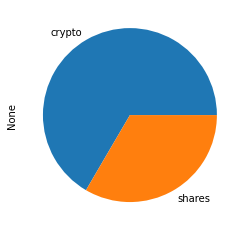

In [22]:
# Plot savings pie chart
# df_savings.plot(kind='pie')
money.plot(kind='pie')

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_agg_value + my_spy_value + my_btc_value + my_eth_value

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! You have enough money in your emergency fund.')
else:
    print("save more")

Congratulations! You have enough money in your emergency fund.
